In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import datetime, timedelta

drive.mount('/content/drive')
shop = pd.read_csv('/content/drive/My Drive/31-M29/training.csv')
shop_to_predict = pd.read_csv('/content/drive/My Drive/31-M29/test.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
shop.head(3)

,Id,itemID,size,color,manufacturerID,price,salutation,dateOfBirth,state,returnShipment,DeliveryDuration
0,0,2985,38,green,21,39.98,Mrs,1967-01-30,North Rhine-Westphalia,0,1 days 00:00:00.000000000
1,1,2408,36,black,3,69.95,Mr,?,Berlin,0,NaN
2,2,134,xxl,blue,32,14.90,Mrs,1971-05-08,Bavaria,1,2 days 00:00:00.000000000


### Delivery duration

Convert delivery duration to integer to only have number of days.
How long an item is being deliverd if at all can influence returnShipment because some customers might not bother shipping back after a long time and if an item has not arrived, it won't be sent back.

In [ ]:
shop['DeliveryDuration'] = shop['DeliveryDuration'].fillna('0 ')
shop['duration_days'] = shop['DeliveryDuration'].str.split(' ').str[0].astype(int)

In [ ]:
#shop['duration_days'].min() #-8156
#shop.loc[shop['duration_days'] <0, 'duration_days'] = shop['duration_days'] + 8156  # doesn't help the model thus left uncleaned

### Salary and  price relative to salary
The price in proportion to the salary might say more than the price itself as each state as well as the genders earn a different amount of money (Company, Family, Not reported are treated as men here) and therefore a certain price might be more worth for one customer than for another.
Salaries are taken from https://www.gehaltsrechner.de/gehaelter/ . 'Relative price' is the percentage of a salary that a price takes.

In [ ]:
shop['salary'] = 0
shop.loc[(shop['state'] == 'North Rhine-Westphalia' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] =  2998
shop.loc[(shop['state'] == 'North Rhine-Westphalia' ) &(shop['salutation'] == 'Mrs'),'salary'] = 2160
shop.loc[(shop['state'] == 'Berlin' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 2821
shop.loc[(shop['state'] == 'Berlin' ) &(shop['salutation'] == 'Mrs'),'salary'] = 2164
shop.loc[(shop['state'] == 'Bavaria' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 3165
shop.loc[(shop['state'] == 'Bavaria' ) &(shop['salutation'] == 'Mrs'),'salary'] = 2269
shop.loc[(shop['state'] == 'Schleswig-Holstein' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 2650
shop.loc[(shop['state'] == 'Schleswig-Holstein' ) &(shop['salutation'] == 'Mrs'),'salary'] = 1933
shop.loc[(shop['state'] == 'Hamburg' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 3227
shop.loc[(shop['state'] == 'Hamburg' ) &(shop['salutation'] == 'Mrs'),'salary'] = 3227
shop.loc[(shop['state'] == 'Lower Saxony' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 2725
shop.loc[(shop['state'] == 'Lower Saxony' ) &(shop['salutation'] == 'Mrs'),'salary'] = 1886
shop.loc[(shop['state'] == 'Rhineland-Palatinate' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 2795
shop.loc[(shop['state'] == 'Rhineland-Palatinate' ) &(shop['salutation'] == 'Mrs'),'salary'] = 1966
shop.loc[(shop['state'] == 'Saxony' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 2308
shop.loc[(shop['state'] == 'Saxony' ) &(shop['salutation'] == 'Mrs'),'salary'] = 1707
shop.loc[(shop['state'] == 'Hesse' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 3248
shop.loc[(shop['state'] == 'Hesse' ) &(shop['salutation'] == 'Mrs'),'salary'] = 2355
shop.loc[(shop['state'] == 'Mecklenburg-Western Pomerania' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 2187
shop.loc[(shop['state'] == 'Mecklenburg-Western Pomerania' ) &(shop['salutation'] == 'Mrs'),'salary'] = 1636
shop.loc[(shop['state'] == 'Baden-Wuerttemberg' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 3244
shop.loc[(shop['state'] == 'Baden-Wuerttemberg' ) &(shop['salutation'] == 'Mrs'),'salary'] = 2269
shop.loc[(shop['state'] == 'Thuringia' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 2307
shop.loc[(shop['state'] == 'Thuringia' ) &(shop['salutation'] == 'Mrs'),'salary'] = 1731
shop.loc[(shop['state'] == 'Saxony-Anhalt' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 2286
shop.loc[(shop['state'] == 'Saxony-Anhalt' ) &(shop['salutation'] == 'Mrs'),'salary'] = 1695
shop.loc[(shop['state'] == 'Bremen' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 2964
shop.loc[(shop['state'] == 'Bremen' ) &(shop['salutation'] == 'Mrs'),'salary'] = 2080
shop.loc[(shop['state'] == 'Brandenburg' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 2224
shop.loc[(shop['state'] == 'Brandenburg' ) &(shop['salutation'] == 'Mrs'),'salary'] = 1713
shop.loc[(shop['state'] == 'Saarland' ) &((shop['salutation'] == 'Mr') | (shop['salutation'] == 'Family')| (shop['salutation'] == 'Company') | (shop['salutation'] == 'not reported')),'salary'] = 2869
shop.loc[(shop['state'] == 'Saarland' ) &(shop['salutation'] == 'Mrs'),'salary'] = 1924

In [ ]:
shop['relative_price'] = shop['price']*100 / shop['salary']

### Age
Customers of different ages have different buying behaviour thus age (at this point in time, not buying) might play a role in their decision wheather to return an item or not. Current date - birth date. 

Outliers are not cleaned to not loose prediction accuracy.

In [ ]:
shop = shop[shop['dateOfBirth'] != '?']
shop['dateOfBirth'] = pd.to_datetime(shop['dateOfBirth'], format='%Y-%m-%d'  , errors='coerce')
shop['dateOfBirth'] = shop['dateOfBirth'].fillna(method='ffill')

shop['Age'] = (pd.to_datetime('today') - shop['dateOfBirth']).astype('<m8[Y]')
shop['Age'] = shop['Age'].astype(int)

### Salutation
Customers of different gender might have different buying behaviour although the difference is very insignificant in this case. Only companies tend to return less, for the rest it is roughly equal.

Changed to numerical because the model can't handle strings.

Tried to one- hot -encode every categorical feature, didn't change the results at all, so dropped it here and later in code.

In [ ]:
shop["salutation"] = shop["salutation"].astype('category')
shop["salutation"] = shop["salutation"].cat.codes

In [ ]:
# one hot encode
#shop = pd.concat([shop,pd.get_dummies(shop['salutation'], prefix='sal')],axis=1) 

### Size

Some sizes of clothes are returned less often then others (e.g. unsized) although the majority have more-less the same amount of 0 and 1 in returnShipment. But because the column is unusable in its original form, the sizes have to be grouped into categories manually.

In [ ]:
# group sizes manually.
shop['size_group'] = 'unsized'
s = shop['size']

shop.loc[((s=='152')|(s=='128')|(s=='104')|(s=='88')|(s=='164')|(s=='176')|(s=='116')|(s=='140')|(s=='96')|(s=='84')|(s=='92')|(s=='90')|(s=='100')|(s=='58')|(s=='76')|(s=='80')|(s=='105')|(s=='110')|(s=='126')|(s=='85')|(s=='95')|(s=='122')|(s== '3432') |(s== '3332')|(s== '3632')|(s== '3434')|(s== '3334')|(s== '3834')|(s== '3634')|(s== '3832')|(s== '4032')|(s== '2932')|(s== '3132')|(s== '4034')),'size_group'] = 'children'
shop.loc[((s=='36')|(s=='S')|(s=='37')|(s=='s')|(s=='XS')|(s=='6+')|(s=='5+')|(s=='5')|(s=='7')|(s=='7+')|(s=='6')|(s=='38+')|(s=='32')|(s=='8')|(s=='4+')|(s=='31')|(s=='35')|(s=='33')|(s=='4')|(s=='30')|(s=='36+')|(s=='28') |(s=='34')|(s=='27') |(s=='3')|(s=='3+')|(s=='29')|(s=='2')|(s=='1')|(s=='37+')|(s=='xs')|(s=='2+')),'size_group'] = 'small'
shop.loc[((s=='38')|(s=='40')|(s=='l')|(s=='39')|(s=='M')|(s=='42')|(s=='m')|(s=='41')|(s=='L')|(s=='9')|(s=='41+')|(s=='11')|(s=='39+')|(s=='9+')|(s=='10')|(s=='40+')|(s=='10+')|(s=='8+')|(s=='12')|(s=='11+')|(s=='12+')|(s=='38')),'size_group'] = 'medium'
shop.loc[((s=='xxl')|(s=='46')|(s=='xl')|(s=='44')|(s=='XXL')|(s=='XL')|(s=='22')|(s=='43')|(s=='48')|(s=='13')|(s=='50')|(s=='21')|(s=='20')|(s=='XXXL')|(s=='24')|(s=='26')|(s=='xxxl')|(s=='25')|(s=='45')|(s=='18')|(s=='23')|(s=='52')|(s=='47')|(s=='19')|(s=='42+')|(s=='43+')|(s=='54')|(s=='56')|(s=='45+')|(s=='14')|(s=='44+')|(s=='46+') |(s=='49')|(s=='13+')),'size_group'] = 'large'          

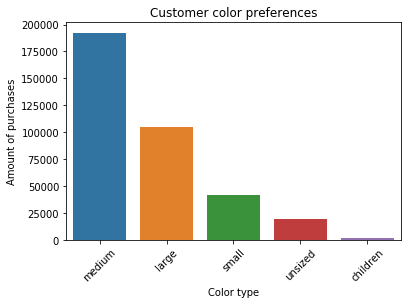

In [ ]:
shop_grouped_by_size = shop.groupby(['size_group'])['Id'].size().reset_index(name='Amount_of_purchases').sort_values(by=['Amount_of_purchases'], ascending = False)
sns.barplot(x = 'size_group', y = 'Amount_of_purchases', data = shop_grouped_by_size  )#, palette=['#202248','steelblue','#fd082d','#53d825','sandybrown', 'indianred', 'gold'])
plt.xlabel('Color type')
plt.ylabel('Amount of purchases');
plt.xticks(rotation=45)
plt.title('Customer color preferences');

In [ ]:
shop["size_group"] = shop["size_group"].astype('category')
shop["size_group"] = shop["size_group"].cat.codes

### Color

Same as for sizes, colors have to be grouped manuually. The proportion of returned and not returned items in each category is almost equal.

In [ ]:
# group colors
shop.loc[shop['color'] == '?', 'color'] =None
shop['color'] = shop['color'].fillna(method='ffill')

shop['color_type'] = '?' 
c = shop['color']
shop.loc[((c=='black')|( c=='brown')|( c=='mocca')|( c=='anthracite')|( c=='grey')|( c=='navy')|( c=='habana')|( c=='ash')|( c=='brwon')|( c=='dark garnet')|( c=='dark grey')|( c=='currant purple')|( c=='cognac')|( c=='ebony')|( c=='darkblue')|( c=='basalt')|( c=='mahagoni')|( c=='dark navy')|( c=='dark oliv')|( c=='iron')|( c=='graphite')|( c=='dark denim')), 'color_type'] = 'dark'
shop.loc[((c=='ocher' )|( c=='curry')|( c=='beige')|( c=='ecru')|( c=='khaki')|( c=='silver')|( c=='white')|( c=='pallid')|( c=='almond')|( c=='creme')|( c=='champagner')|( c=='cortina mocca')|( c=='champagner')|( c=='apricot')|(c=='opal')|(c=='ingwer')|(c=='vanille')|(c=='perlmutt')|( c=='pallid')|( c=='almond')|( c=='almond')|( c=='ivory')), 'color_type'] = 'light'
shop.loc[((c=='red')|( c=='magenta')|( c=='purple')|( c=='pink')|( c=='aubergine')|( c=='orange')|( c=='antique pink')|( c=='copper coin')|( c=='amethyst')|( c=='terracotta')|( c=='amethyst')|( c=='coral')|( c=='crimson')|( c=='bordeaux')|( c=='berry')|( c=='hibiscus')|( c=='fuchsia')),'color_type'] = 'red tone'
shop.loc[((c=='denim' )|( c=='petrol')|( c=='blue')|( c=='turquoise')|( c=='navy')|( c=='aqua')|( c=='azure')|( c=='cobalt blue')|( c=='blau')|( c=='baltic blue')|( c=='aquamarine')|( c=='amethyst')|( c=='amethyst')),'color_type'] = 'blue tone'
shop.loc[((c=='green' )|( c=='olive')|( c=='avocado')|( c=='jade')|( c=='oliv')|( c=='mint')),'color_type'] = 'green tone'
shop.loc[((c=='gold' )|( c=='curry')|( c=='orange')|( c=='caramel')|( c=='copper coin')|( c=='bronze')|( c=='lemon')|( c=='yellow')|( c=='mango')),'color_type'] = 'yellow tone'
shop.loc[((c=='nature' )|( c=='stained')|( c=='aviator')|( c=='kanel')|( c=='curled')|( c=='striped')|( c=='leopard')|( c=='floral')|( c=='ancient')),'color_type'] = 'pattern'


In [ ]:
shop["color_type"] = shop["color_type"].astype('category')
shop["color_type"] = shop["color_type"].cat.codes

### State

Customers in different states display slightly different buying bahoviours.

In [ ]:
shop["state"] = shop["state"].astype('category')
shop["state"] = shop["state"].cat.codes

### Percentage of returned (manufacturer)

As the test set doesn't have labels but the manfacturer and item id might be important for predictions, the data from the train set is used to generate values which are inserted into the test set.
For this the data is grouped by manufacturer and the percentage of returned items is calculated. The higher the number the more often an item has been sent back. For the unseen cases of manfacturer or item id the median is taken.

In [ ]:
shop['sum'] = shop.groupby(['manufacturerID'])['returnShipment'].transform('sum')
shop['count'] = shop.groupby(['manufacturerID'])['returnShipment'].transform('count')
shop['returned_percent'] = (shop['sum'] / shop['count'] ) *100
shop_to_predict['returned_percent'] = shop['returned_percent'].median()#- 10
shop_grouped = shop.groupby('manufacturerID')['returned_percent'].min().reset_index(name = "returned_percent")

for ii in range(len(shop_grouped.index)):
  shop_to_predict.loc[shop_to_predict['manufacturerID'] == shop_grouped.loc[ii, 'manufacturerID'], 'returned_percent'] = shop_grouped.loc[ii, 'returned_percent']

### Percentage of returned (item)

In [ ]:
shop['sum2'] = shop.groupby(['itemID'])['returnShipment'].transform('sum')
shop['count2'] = shop.groupby(['itemID'])['returnShipment'].transform('count')
shop['returned_percent_item'] = (shop['sum2'] / shop['count2'] ) *100
shop_to_predict['returned_percent_item'] = shop['returned_percent_item'].median() # put lower? -10?
shop_grouped_item = shop.groupby('itemID')['returned_percent_item'].min().reset_index(name = "returned_percent_item")

for ii in range(len(shop_grouped.index)):
  shop_to_predict.loc[shop_to_predict['itemID'] == shop_grouped_item.loc[ii, 'itemID'], 'returned_percent_item'] = shop_grouped_item.loc[ii, 'returned_percent_item']

### Test Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#shop_train = shop[['price', 'state', 'Age', 'returned_percent',	'returned_percent_item', 'duration_days', 'returnShipment',  'salutation', 'itemID', 	'manufacturerID', 'size_group', 'color_type']]

In [ ]:
shop_train = shop[['price', 'state', 'Age', 'returned_percent',	'returned_percent_item', 'duration_days', 'returnShipment',  'salutation', 'itemID', 	'manufacturerID' ]] #afer manual pca

In [ ]:
labels = np.array(shop_train.pop('returnShipment')) # put labels in array and remove from dataset

In [ ]:
# 1/3 in test data, 2/3 in train data:
train, test, train_labels, test_labels = train_test_split(shop_train,labels, stratify = labels,test_size = 0.3, random_state = 50)

Random forest has been chosen as neither AdaBoost nor a simple neural network gave better results but an ensamble method still has better performance than any other method.

In [ ]:
#model = RandomForestClassifier(n_estimators=120, criterion= 'entropy', max_depth = 16 )
#criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf , max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split..

In [ ]:
model = RandomForestClassifier(n_estimators=120, criterion= 'gini', max_depth = 16 )
#model = RandomForestClassifier(n_estimators=120,criterion= 'entropy', max_depth = 30, min_samples_split = 4, min_samples_leaf = 2, max_features = 'sqrt')

Hyperparameters in model are chosen by trying manually. Incresing min_samples_split or min_samples_leaf from default lead to decreased accuracy. 120 n_estimators also seems to be an optimal number as accuracy is lower with 70 and doesn't change with 200. 'Gini' and 'entropy' give similar results. Higher depth leads to overfitting, lower is decresed train and test accuracy.

In [ ]:
model.fit(train, train_labels); # fit on training data

In [ ]:
threshold = 0.5

train_predictions = model.predict_proba(train)
test_predictions = model.predict_proba(test)
predicted = (train_predictions [:,1] >= threshold).astype('int')
predicted_test = (test_predictions [:,1] >= threshold).astype('int')

from sklearn.metrics import accuracy_score
acc_train = accuracy_score(train_labels, predicted)
acc_test = accuracy_score(test_labels, predicted_test)

print(f'Train set accuracy: {acc_train}')    
print(f'Test set accuracy: {acc_test}')

#Train set accuracy: 0.7234076395129672
#Test set accuracy: 0.6579110958535522 

Train set accuracy: 0.7341758058230807
Test set accuracy: 0.6574471835886397


Features are chosen after examining their importances. Everything equal lower than 0.01 is removed.

In [ ]:
feature_list = list(shop_train.columns)
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: duration_days        Importance: 0.36
Variable: returned_percent_item Importance: 0.24
Variable: Age                  Importance: 0.1
Variable: price                Importance: 0.08
Variable: state                Importance: 0.07
Variable: returned_percent     Importance: 0.05
Variable: itemID               Importance: 0.05
Variable: manufacturerID       Importance: 0.03
Variable: salutation           Importance: 0.01


[None, None, None, None, None, None, None, None, None]

### Features For Model:

In [ ]:
shop_to_predict['DeliveryDuration'] = shop_to_predict['DeliveryDuration'].fillna('0 ')
shop_to_predict['duration_days'] = shop_to_predict['DeliveryDuration'].str.split(' ').str[0].astype(int, errors = 'ignore')

In [ ]:
shop_to_predict['dateOfBirth'] = pd.to_datetime(shop_to_predict['dateOfBirth'], format='%Y-%m-%d'  , errors='coerce')
shop_to_predict['dateOfBirth'] = shop_to_predict['dateOfBirth'].fillna(method='ffill')

shop_to_predict['Age'] = (pd.to_datetime('today') - shop_to_predict['dateOfBirth']).astype('<m8[Y]')
shop_to_predict['Age'] = shop_to_predict['Age'].astype(int)

In [ ]:
shop_to_predict["salutation"] = shop_to_predict["salutation"].astype('category')
shop_to_predict["salutation"] = shop_to_predict["salutation"].cat.codes

In [ ]:
shop_to_predict['size_group'] = 'unsized'
s = shop_to_predict['size']
shop_to_predict.loc[((s=='152')|(s=='128')|(s=='104')|(s=='88')|(s=='164')|(s=='176')|(s=='116')|(s=='140')|(s=='96')|(s=='84')|(s=='92')|(s=='90')|(s=='100')|(s=='58')|(s=='76')|(s=='80')|(s=='105')|(s=='110')|(s=='126')|(s=='85')|(s=='95')|(s=='122')|(s== '3432') |(s== '3332')|(s== '3632')|(s== '3434')|(s== '3334')|(s== '3834')|(s== '3634')|(s== '3832')|(s== '4032')|(s== '2932')|(s== '3132')|(s== '4034')),'size_group'] = 'children'
shop_to_predict.loc[((s=='36')|(s=='S')|(s=='37')|(s=='s')|(s=='XS')|(s=='6+')|(s=='5+')|(s=='5')|(s=='7')|(s=='7+')|(s=='6')|(s=='38+')|(s=='32')|(s=='8')|(s=='4+')|(s=='31')|(s=='35')|(s=='33')|(s=='4')|(s=='30')|(s=='36+')|(s=='28') |(s=='34')|(s=='27') |(s=='3')|(s=='3+')|(s=='29')|(s=='2')|(s=='1')|(s=='37+')|(s=='xs')|(s=='2+')),'size_group'] = 'small'
shop_to_predict.loc[((s=='38')|(s=='40')|(s=='l')|(s=='39')|(s=='M')|(s=='42')|(s=='m')|(s=='41')|(s=='L')|(s=='9')|(s=='41+')|(s=='11')|(s=='39+')|(s=='9+')|(s=='10')|(s=='40+')|(s=='10+')|(s=='8+')|(s=='12')|(s=='11+')|(s=='12+')|(s=='unsized')|(s=='38')),'size_group'] = 'medium'
shop_to_predict.loc[((s=='xxl')|(s=='46')|(s=='xl')|(s=='44')|(s=='XXL')|(s=='XL')|(s=='22')|(s=='43')|(s=='48')|(s=='13')|(s=='50')|(s=='21')|(s=='20')|(s=='XXXL')|(s=='24')|(s=='26')|(s=='xxxl')|(s=='25')|(s=='45')|(s=='18')|(s=='23')|(s=='52')|(s=='47')|(s=='19')|(s=='42+')|(s=='43+')|(s=='54')|(s=='56')|(s=='45+')|(s=='14')|(s=='44+')|(s=='46+') |(s=='49')|(s=='13+')),'size_group'] = 'large'          

In [ ]:
shop_to_predict["size_group"] = shop_to_predict["size_group"].astype('category')
shop_to_predict["size_group"] = shop_to_predict["size_group"].cat.codes

In [ ]:
shop_to_predict["state"] = shop_to_predict["state"].astype('category')
shop_to_predict["state"] = shop_to_predict["state"].cat.codes

### Model

In [ ]:
shop_to_predict_features = shop_to_predict[['price', 'state', 'Age', 'returned_percent',	'returned_percent_item', 'duration_days',  'salutation', 'itemID', 	'manufacturerID' ]]

In [ ]:
#shop_to_predict_features = shop_to_predict[['price', 'state', 'Age', 'returned_percent',	'returned_percent_item', 'duration_days',  'salutation', 'itemID', 	'manufacturerID', 'size_group', 'color_type' ]]

In [ ]:
threshold = 0.5  #preliminary threshold   
model.fit(shop_train, labels)
train_predictions_ = model.predict_proba(shop_train) # predict on train data    
test_predictions_ = model.predict_proba(shop_to_predict_features) # predict on test data

predicted_shop_ = (train_predictions_ [:,1] >= threshold).astype('int')
predicted_shop_to_predict_ = (test_predictions_ [:,1] >= threshold).astype('int')

from sklearn.metrics import accuracy_score
acc_train = accuracy_score(labels, predicted_shop_)

print(f'Train set accuracy: {acc_train}') 

Train set accuracy: 0.7223661905968084


In [ ]:
predictions_for_roc = train_predictions_[:, 1]

In [ ]:
# calculate new threshold
#following code from: https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python  on 2020 02 16
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds =roc_curve(y_true = labels, y_score = predictions_for_roc)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) 
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]


Area under the ROC curve : 0.809140


,fpr,tpr,1-fpr,tf,thresholds
81511,0.277941,0.722055,0.722059,-0.000005,0.531407


In [ ]:
threshold = 0.52 # changed according to auc

predicted_shop_ = (train_predictions_ [:,1] >= threshold).astype('int')
predicted_shop_to_predict_ = (test_predictions_ [:,1] >= threshold).astype('int')

acc_train = accuracy_score(labels, predicted_shop_)
print(f'Train set accuracy: {acc_train}') 

Train set accuracy: 0.7231511352470766


In [ ]:
shop_to_predict['returnShipment'] = predicted_shop_to_predict_
shop_predictions = shop_to_predict[['Id','returnShipment']]
shop_predictions = shop_predictions.rename(columns= {'Id' : 'Id (String)'})

In [ ]:
export_csv = shop_predictions.to_csv(r'/content/drive/My Drive/31-M29/export_prediction11.csv', header = True, index=False)